<a href="https://colab.research.google.com/github/Saswata020/-Sentiment-Analysis-of-Mobile-phone-reviews/blob/main/NLP__product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**
As the digital era evolves the online shopping has seen tremendous growth.Every Business person wants to analyze what their customers are talking about their products. The reviews, star-rating are the accessories of the product which describes the customers engagement. The process of analyzing the customer feelings is said to Sentiment Analysis.

# **Objective:**

customer reviews for different mobile phones listed on Amazon and we have taken the reviews dataset and  our objective perform Sentiment Analysis for those reviews.

## Importing essential libraries:

In [1]:
#Import the Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/PROJECTS/Amazon_Unlocked_Mobile.csv"
reviews_df = pd.read_csv(path)
reviews_df.head(2)
# Dataset is now stored in a Pandas Dataframe

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0


In [4]:
#copy of dataset
data = reviews_df.copy()
#Summary of the data
data.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [5]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [6]:
#Null value checking in reviews
data['Reviews'].isnull().values.any()


True

In [7]:
#Droping null values 
data = data[data['Reviews'].notna()]
data['Reviews'].isnull().values.any()


False

In [8]:
#Checking null values in rating
data['Rating'].isnull().values.any()

False

In [9]:
#dataframe with reviews and rating
df=data[['Reviews','Rating']]
df

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4
...,...,...
413835,another great deal great price,5
413836,Ok,3
413837,Passes every drop test onto porcelain tile!,5
413838,I returned it because it did not meet my needs...,3


# Exploratory Data Analysis

In [10]:
#proportion of different ratings
df['Rating'].value_counts()

5    223580
1     72337
4     61374
3     31763
2     24724
Name: Rating, dtype: int64

# Data Visualization

Text(0, 0.5, 'Count')

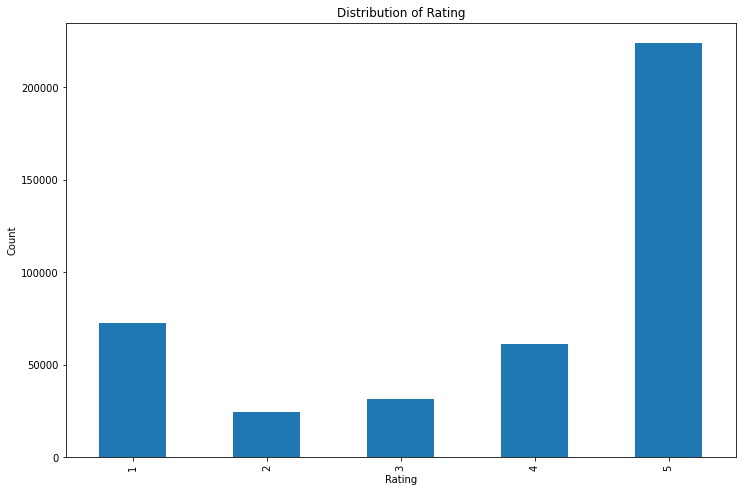

In [11]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

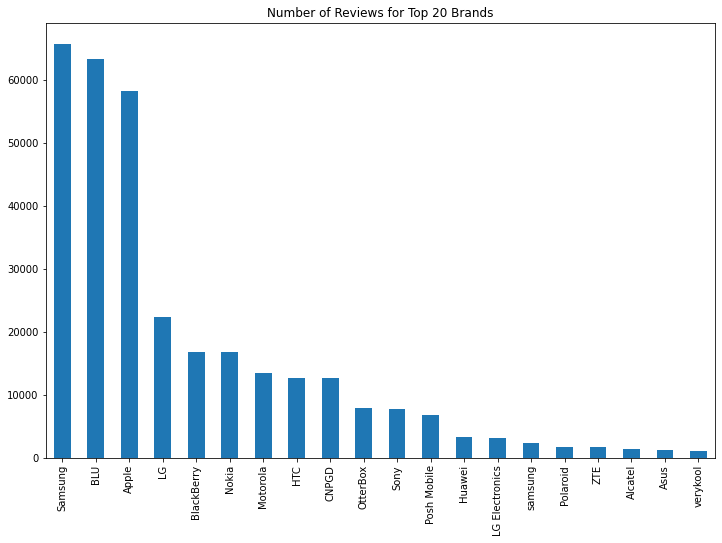

In [ ]:
# Plot number of reviews for top 20 brands
brands = reviews_df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

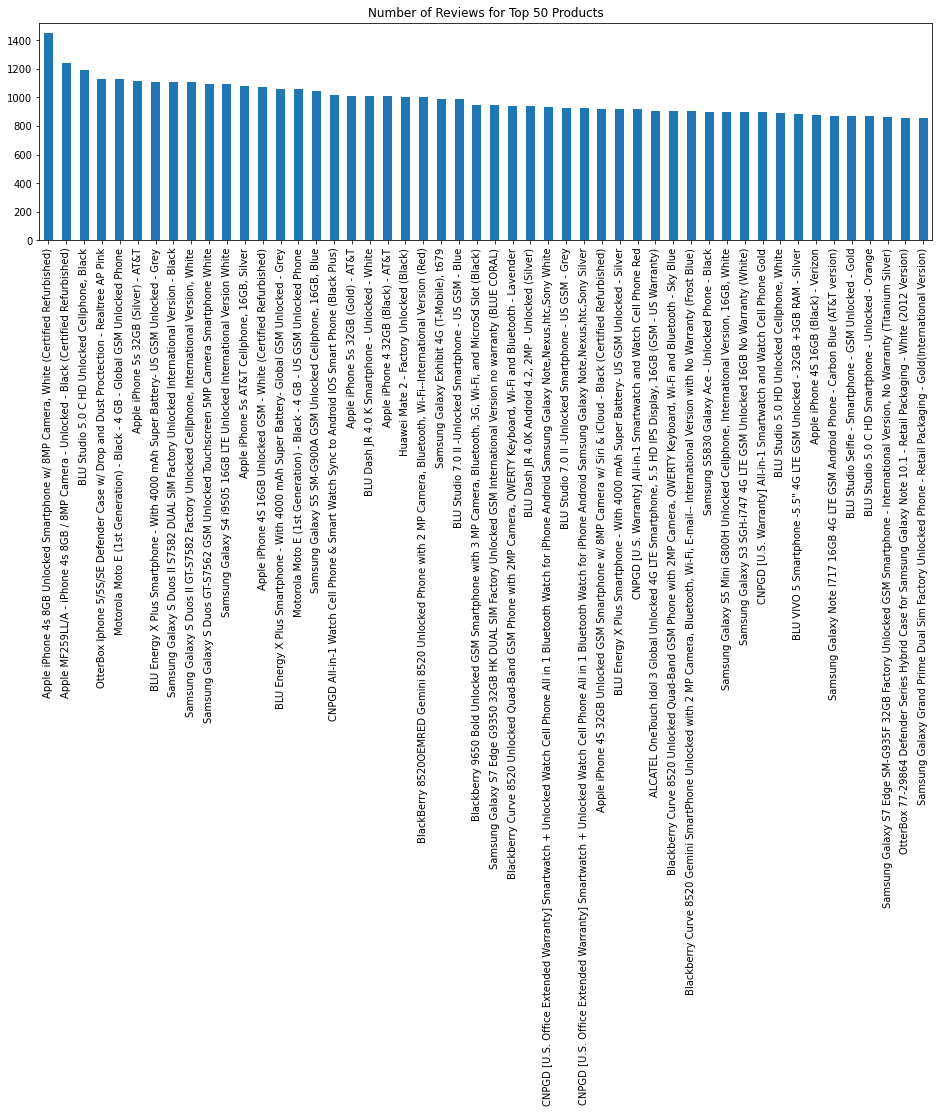

In [ ]:
# Plot number of reviews for top 50 products
products = reviews_df["Product Name"].value_counts()
plt.figure(figsize=(16,4))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0, 0.5, 'Count')

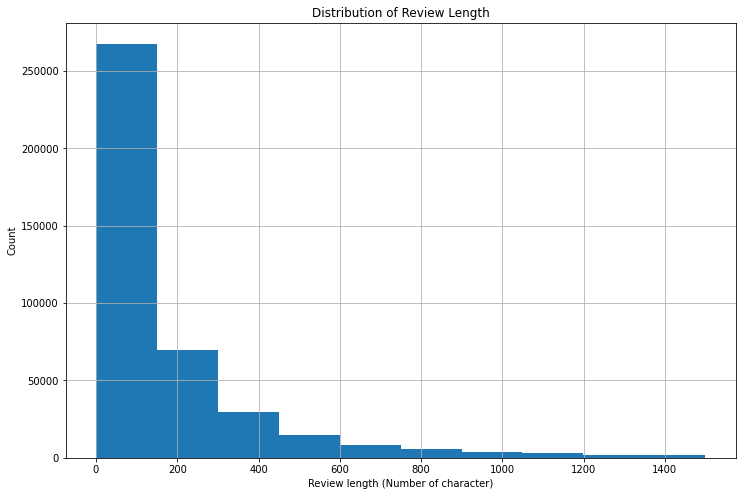

In [ ]:
# Plot distribution of review length
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

# Data Preprocessing

In [ ]:
df['Rating']=df['Rating'].astype(int) #convert the star_rating column to int

df['label']=np.where(df['Rating']>=4,1,0) #1-Positve,0-Negative

In [13]:
#Dataframe content
df.head(2)

,Reviews,Rating,label
0,I feel so LUCKY to have found this used (phone...,5,1
1,"nice phone, nice up grade from my pantach revu...",4,1


In [14]:
df['label'].value_counts()

1    284954
0    128824
Name: label, dtype: int64

In [15]:
#Taking balanced dataset
df = df.sample(frac=1).reset_index(drop=True) #shuffle
data=df[df['label']==0][:50000]
data=data.append(df[df['label']==1][:50000])
data = data.reset_index(drop=True)
display(data['label'].value_counts())
data

0    50000
1    50000
Name: label, dtype: int64

,Reviews,Rating,label
0,"Why is xt1097, instead xt1095",2,0
1,When it works its a good phone. Constantly fre...,1,0
2,It took 10 hrs to charge the battery to 100%,2,0
3,"Mine comes dual sim, the first day after upgra...",3,0
4,Total piece of s***. You get what you pay for ...,1,0
...,...,...,...
99995,Over the weekend I shows this to a bunch of re...,5,1
99996,very good！,5,1
99997,I like it. The camera is not terrific--thus th...,4,1
99998,Like this cell very much!! Love its customizat...,5,1


In [16]:
#lower case and spling process
data['pre_process'] = data['Reviews'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [17]:
#re - provides functions to pre process the strings as per the given regular expression
import re
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(r'http\S+', '', x))

In [18]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\’t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", "are", s)
 s = re.sub(r"\'s", "is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\t", " not", s)
 s = re.sub(r"\'ve", "have", s)
 s = re.sub(r"\'m", "am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))


In [ ]:
#download all from  nltk library
nltk.download('all')

* nltk — Natural Language Toolkit is a collection of libraries for natural language processing.
* stopwords — A collection of words that don’t provide any meaning to a sentence.
* WordNetLemmatizer — It is used to convert different forms of words into a single item but still keeping the context intact.

In [20]:
data['pre_process']=data['pre_process'].apply(lambda x: ' '.join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [21]:
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop]))

In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
data

,Reviews,Rating,label,pre_process
0,The watch was not as I expected it to be. It w...,3,0,watch expected le nfc work ca turn volume
1,watch all in all is fine i cant access my txt ...,3,0,watch fine cant access txt msg threw bluetooth...
2,"Ended up returning, not what I expected.",2,0,ended returning expected
3,Ok,3,0,ok
4,samsung would not register the phone and blue ...,1,0,samsung would register phone blue tooth poor l...
...,...,...,...,...
99995,Good Classic Flip Phone,4,1,good classic flip phone
99996,The best smartphone phone I've ever had. Just ...,5,1,best smartphone phone ihave ever wish onboard ...
99997,Good,4,1,good
99998,Bougth this phone for many reasons especially ...,5,1,bougth phone many reason especially play radio...


# Word Cloud

* Now, we will create a Word Cloud. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as 
compared to less frequent words.

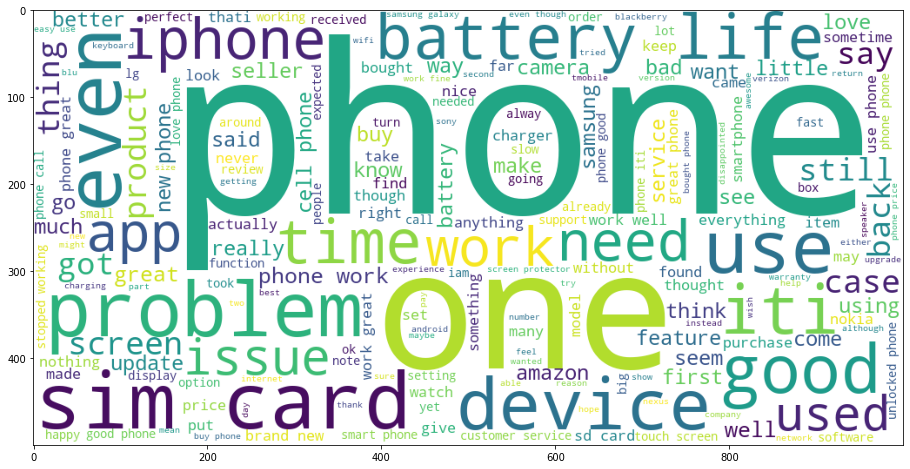

In [ ]:
from wordcloud import WordCloud
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in data['pre_process']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

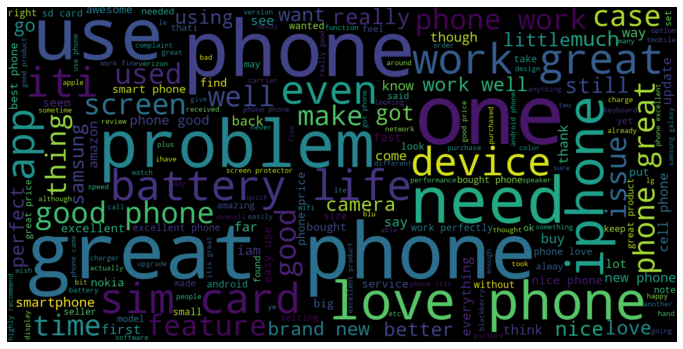

In [ ]:
#positive word cloud
pos_words = data[data.label == 1]
pos_string = []
for t in pos_words.pre_process:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

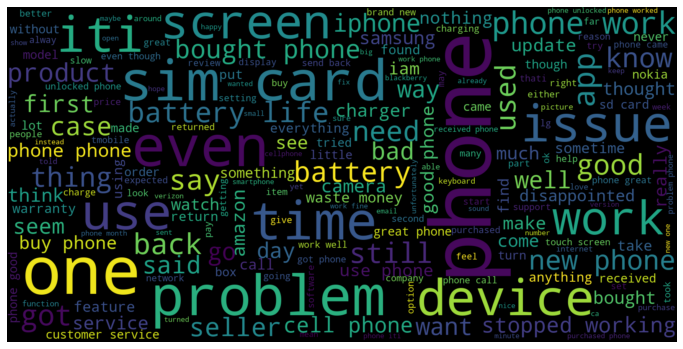

In [ ]:
#negative word cloud
neg_words = data[data.label == 0]
neg_string = []
for t in neg_words.pre_process:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Spilt Train And Test data

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.3, random_state=30)
print('Train: ',X_train.shape,Y_train.shape,'Test: ',(X_test.shape,Y_test.shape))

Train:  (70000,) (70000,) Test:  ((30000,), (30000,))


# Text Transformation

In [25]:
print('TFIDF Vectorizer……')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
#print(tf_x_train)
tf_x_test = vectorizer.transform(X_test)
#print(tf_x_test)

TFIDF Vectorizer……


# Hyperparameter tuning

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Logistic Regession

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)#Grid Search
logreg_cv.fit(tf_x_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8901285714285713


In [ ]:
#Support Vector machine

from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=3)
 
# fitting the model for grid search
grid.fit(tf_x_train, Y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier


In [28]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

In [29]:
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [40]:
space = {'criterion' : hp.choice('criterion', ['entropy','gini']),
         'max_depth' : hp.quniform('max_depth',10,1200,10),
         'max_features' : hp.choice('max_features',['auto','sqrt','log2',None]),
         'min_samples_leaf' : hp.uniform('min_samples_leaf',0,0.5),
         'min_samples_split' : hp.uniform('min_samples_split',0,1),
         'n_estimators': hp.choice('n_estimators',[550,750,1200,1300,1500])
    
}

In [41]:
def objective(space):
    model = RandomForestClassifier( criterion = space['criterion'],
                                    max_depth = space['max_depth'],
                                    max_features = space['max_features'],
                                    min_samples_leaf = space['min_samples_leaf'],
                                    min_samples_split = space['min_samples_split'],
                                    n_estimators = space['n_estimators']
    )
    
    accuracy = cross_val_score(model,  tf_x_train,Y_train,cv=5).mean()
    return {'loss' : -accuracy , 'status' : STATUS_OK}

In [42]:

from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn = objective,
            space=space,
            algo= tpe.suggest,
            max_evals=80,
            trials=trials
           )
best

 28%|██▊       | 22/80 [4:22:46<11:32:47, 716.68s/it, best loss: -0.5711142857142857] 


KeyboardInterrupt: ignored

In [30]:
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In [31]:
# define objective function

def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, tf_x_train,Y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [32]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [3:56:40<00:00, 142.01s/it, best loss: -0.7898857142857143]
Best: {'criterion': 0, 'max_depth': 15.0, 'n_estimators': 2}


# Support Vector machine

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=1, gamma=1)

In [ ]:
#fit the data
clf.fit(tf_x_train,Y_train)

SVC(C=1, gamma=1)

In [ ]:
test_pred=clf.predict(tf_x_test)

In [34]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Evaluation

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

Accuracy_score:  0.9127666666666666
Precision_score:  0.9134692782398712
Recall_score:  0.9112077617932419
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     15055
           1       0.91      0.91      0.91     14945

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



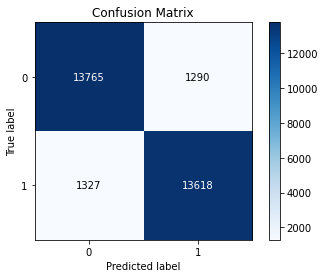

In [ ]:
#rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(Y_test,test_pred)
acc_score = accuracy_score(Y_test,test_pred)
pre_score = precision_score(Y_test,test_pred)
rec_score = recall_score(Y_test,test_pred)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(Y_test,test_pred)
print(cr)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,C=10, penalty='l2', solver='liblinear')


In [ ]:
logreg.fit(tf_x_train,Y_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [ ]:
y_test_pred=logreg.predict(tf_x_test)

# Evaluation

Accuracy_score:  0.8907666666666667
Precision_score:  0.8977908086731216
Recall_score:  0.8810304449648712
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     15055
           1       0.90      0.88      0.89     14945

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



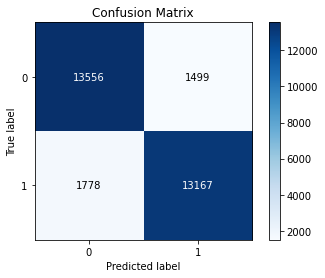

In [ ]:
#rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(Y_test,y_test_pred)
acc_score = accuracy_score(Y_test,y_test_pred)
pre_score = precision_score(Y_test,y_test_pred)
rec_score = recall_score(Y_test,y_test_pred)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(Y_test,y_test_pred)
print(cr)

## MultiNomialNB

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
nb = MultinomialNB()

In [63]:
nb.fit(tf_x_train,Y_train)

MultinomialNB()

In [64]:
predictions = nb.predict(tf_x_test)

Accuracy_score:  0.8666
Precision_score:  0.8849644691479631
Recall_score:  0.8416192706590833
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     15055
           1       0.88      0.84      0.86     14945

    accuracy                           0.87     30000
   macro avg       0.87      0.87      0.87     30000
weighted avg       0.87      0.87      0.87     30000



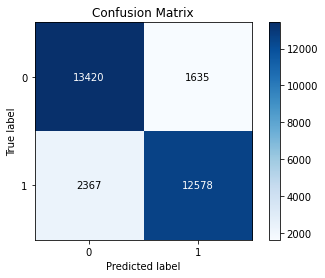

In [65]:
#rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(Y_test,predictions)
acc_score = accuracy_score(Y_test,predictions)
pre_score = precision_score(Y_test,predictions)
rec_score = recall_score(Y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(Y_test,predictions)
print(cr)

## Random Forest

In [51]:
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 15, n_estimators= 300)

In [52]:
rfc.fit(tf_x_train,Y_train)

RandomForestClassifier(max_depth=15, n_estimators=300)

In [53]:
#predict the target
predictions = rfc.predict(tf_x_test)

## Evaluation

Accuracy_score:  0.7863666666666667
Precision_score:  0.7485151973914056
Recall_score:  0.8601538976246236
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.71      0.77     15055
           1       0.75      0.86      0.80     14945

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000



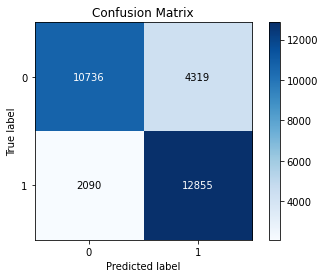

In [54]:
#rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(Y_test,predictions)
acc_score = accuracy_score(Y_test,predictions)
pre_score = precision_score(Y_test,predictions)
rec_score = recall_score(Y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(Y_test,predictions)
print(cr)

# Predict for Custom Input

In [ ]:
def text_transformation(input):
    corpus = []
    for item in input:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lemmatizer.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")


In [ ]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = vectorizer.transform(input)
    prediction = logreg.predict(transformed_input)
    expression_check(prediction)

In [ ]:
input1 = ["mobile is  new "]
input2 = ["battery has an issue"]

In [ ]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
